In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#pakai tensorflow ini karena yang baru beberapa isinya beda


import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from gensim.models import Word2Vec

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split




Instructions for updating:
non-resource variables are not supported in the long term


[nltk_data] Downloading package punkt to C:\Users\Derren Delano
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Derren Delano
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
d = {"Data" : ["This was a great movie with a good cast, all of them hitting on all cylinders.",
                "Even if you're a huge Sandler fan, please don't bother with this extremely disappointing comedy!",
                "A movie of outstanding brilliance and a poignant and unusual love story",
                "I had the misfortune to watch this rubbish on Sky Cinema Max in a cold winter night",
                "I am at a distinct disadvantage here. I have not seen the first two movies in this series",
                "This program is a lot of fun and the title song is so catchy I can't get it out of my head"],
                "Label" : ["Positive", "Negative","Positive","Negative","Negative","Positive"]}
dataset = pd.DataFrame(d,columns = ['Data','Label'], index =['1','2','3','4','5','6'])              
              
print(dataset)

                                                Data     Label
1  This was a great movie with a good cast, all o...  Positive
2  Even if you're a huge Sandler fan, please don'...  Negative
3  A movie of outstanding brilliance and a poigna...  Positive
4  I had the misfortune to watch this rubbish on ...  Negative
5  I am at a distinct disadvantage here. I have n...  Negative
6  This program is a lot of fun and the title son...  Positive


In [3]:
dataset['Data'].iloc[1]

"Even if you're a huge Sandler fan, please don't bother with this extremely disappointing comedy!"

# pre-processing

In [4]:
#remove character tidak penting

def clean_non_alphanumeric(Data_text):
    return re.sub('[^a-zA-Z]',' ',Data_text)

dataset['CleanData'] = dataset['Data'].apply(clean_non_alphanumeric)
print(dataset)
dataset['CleanData'].iloc[1]

                                                Data     Label  \
1  This was a great movie with a good cast, all o...  Positive   
2  Even if you're a huge Sandler fan, please don'...  Negative   
3  A movie of outstanding brilliance and a poigna...  Positive   
4  I had the misfortune to watch this rubbish on ...  Negative   
5  I am at a distinct disadvantage here. I have n...  Negative   
6  This program is a lot of fun and the title son...  Positive   

                                           CleanData  
1  This was a great movie with a good cast  all o...  
2  Even if you re a huge Sandler fan  please don ...  
3  A movie of outstanding brilliance and a poigna...  
4  I had the misfortune to watch this rubbish on ...  
5  I am at a distinct disadvantage here  I have n...  
6  This program is a lot of fun and the title son...  


'Even if you re a huge Sandler fan  please don t bother with this extremely disappointing comedy '

In [5]:
#mengubah semuanya menjadi lowercase

def clean_lowercase(Data_text):
    return str(Data_text).lower()
dataset['CleanData'] = dataset['CleanData'].apply(clean_lowercase)
print(dataset)

                                                Data     Label  \
1  This was a great movie with a good cast, all o...  Positive   
2  Even if you're a huge Sandler fan, please don'...  Negative   
3  A movie of outstanding brilliance and a poigna...  Positive   
4  I had the misfortune to watch this rubbish on ...  Negative   
5  I am at a distinct disadvantage here. I have n...  Negative   
6  This program is a lot of fun and the title son...  Positive   

                                           CleanData  
1  this was a great movie with a good cast  all o...  
2  even if you re a huge sandler fan  please don ...  
3  a movie of outstanding brilliance and a poigna...  
4  i had the misfortune to watch this rubbish on ...  
5  i am at a distinct disadvantage here  i have n...  
6  this program is a lot of fun and the title son...  


In [6]:
#tokenization

def clean_tokenization(Data_text):
    return word_tokenize(Data_text)

dataset['CleanData'] = dataset['CleanData'].apply(clean_tokenization)
print(dataset)


                                                Data     Label  \
1  This was a great movie with a good cast, all o...  Positive   
2  Even if you're a huge Sandler fan, please don'...  Negative   
3  A movie of outstanding brilliance and a poigna...  Positive   
4  I had the misfortune to watch this rubbish on ...  Negative   
5  I am at a distinct disadvantage here. I have n...  Negative   
6  This program is a lot of fun and the title son...  Positive   

                                           CleanData  
1  [this, was, a, great, movie, with, a, good, ca...  
2  [even, if, you, re, a, huge, sandler, fan, ple...  
3  [a, movie, of, outstanding, brilliance, and, a...  
4  [i, had, the, misfortune, to, watch, this, rub...  
5  [i, am, at, a, distinct, disadvantage, here, i...  
6  [this, program, is, a, lot, of, fun, and, the,...  


In [7]:
#Drop noise removal

# dataset[CleanData.columns[0:]] = dataset[CleanData.columns[0:]].replace('dissapointing','',regex=true)
# dataset[CleanData.columns[0:]] = dataset[CleanData.columns[0:]].replace('misfortune','',regex=true)
# dataset[CleanData.columns[0:]] = dataset[CleanData.columns[0:]].replace('rubbish','',regex=true)
# dataset[CleanData.columns[0:]] = dataset[CleanData.columns[0:]].replace('disadvantage','',regex=true)

In [8]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
#meng-remove stopwords

stop_words = set(stopwords.words('english'))
def clean_stopwords(token):
    return [item for item in token if item not in stop_words]

dataset['CleanData'] = dataset['CleanData'].apply(clean_stopwords)
print(dataset)

                                                Data     Label  \
1  This was a great movie with a good cast, all o...  Positive   
2  Even if you're a huge Sandler fan, please don'...  Negative   
3  A movie of outstanding brilliance and a poigna...  Positive   
4  I had the misfortune to watch this rubbish on ...  Negative   
5  I am at a distinct disadvantage here. I have n...  Negative   
6  This program is a lot of fun and the title son...  Positive   

                                           CleanData  
1     [great, movie, good, cast, hitting, cylinders]  
2  [even, huge, sandler, fan, please, bother, ext...  
3  [movie, outstanding, brilliance, poignant, unu...  
4  [misfortune, watch, rubbish, sky, cinema, max,...  
5  [distinct, disadvantage, seen, first, two, mov...  
6  [program, lot, fun, title, song, catchy, get, ...  


In [10]:
#stemming

stemmer =  PorterStemmer()
def clean_stem(token):
    return[stemmer.stem(i) for i in token]

dataset['CleanData'] = dataset['CleanData'].apply(clean_stem)
print(dataset)

                                                Data     Label  \
1  This was a great movie with a good cast, all o...  Positive   
2  Even if you're a huge Sandler fan, please don'...  Negative   
3  A movie of outstanding brilliance and a poigna...  Positive   
4  I had the misfortune to watch this rubbish on ...  Negative   
5  I am at a distinct disadvantage here. I have n...  Negative   
6  This program is a lot of fun and the title son...  Positive   

                                           CleanData  
1             [great, movi, good, cast, hit, cylind]  
2  [even, huge, sandler, fan, pleas, bother, extr...  
3  [movi, outstand, brillianc, poignant, unusu, l...  
4  [misfortun, watch, rubbish, sky, cinema, max, ...  
5  [distinct, disadvantag, seen, first, two, movi...  
6  [program, lot, fun, titl, song, catchi, get, h...  


In [11]:
#lemmatization

Lemma = WordNetLemmatizer()

def clean_lemmatization(token):
    return [Lemma.lemmatize(word=w,pos='v') for w in token]

dataset['CleanData'] = dataset['CleanData'].apply(clean_lemmatization)
print(dataset)

                                                Data     Label  \
1  This was a great movie with a good cast, all o...  Positive   
2  Even if you're a huge Sandler fan, please don'...  Negative   
3  A movie of outstanding brilliance and a poigna...  Positive   
4  I had the misfortune to watch this rubbish on ...  Negative   
5  I am at a distinct disadvantage here. I have n...  Negative   
6  This program is a lot of fun and the title son...  Positive   

                                           CleanData  
1             [great, movi, good, cast, hit, cylind]  
2  [even, huge, sandler, fan, pleas, bother, extr...  
3  [movi, outstand, brillianc, poignant, unusu, l...  
4  [misfortun, watch, rubbish, sky, cinema, max, ...  
5  [distinct, disadvantag, see, first, two, movi,...  
6  [program, lot, fun, titl, song, catchi, get, h...  


In [12]:
#remove kata yang punya length kurang dari atau sama dengan 2

def Clean_length(token):
    return [i for i in token if len(i) > 2 ]

dataset['CleanData'] = dataset['CleanData'].apply(Clean_length)
print(dataset)

                                                Data     Label  \
1  This was a great movie with a good cast, all o...  Positive   
2  Even if you're a huge Sandler fan, please don'...  Negative   
3  A movie of outstanding brilliance and a poigna...  Positive   
4  I had the misfortune to watch this rubbish on ...  Negative   
5  I am at a distinct disadvantage here. I have n...  Negative   
6  This program is a lot of fun and the title son...  Positive   

                                           CleanData  
1             [great, movi, good, cast, hit, cylind]  
2  [even, huge, sandler, fan, pleas, bother, extr...  
3  [movi, outstand, brillianc, poignant, unusu, l...  
4  [misfortun, watch, rubbish, sky, cinema, max, ...  
5  [distinct, disadvantag, see, first, two, movi,...  
6  [program, lot, fun, titl, song, catchi, get, h...  


In [13]:
#merubah list dari token menjadi string

def convert_to_string(listData):
    return ' '.join(listData)

dataset['CleanData'] = dataset['CleanData'].apply(convert_to_string)
print(dataset)

                                                Data     Label  \
1  This was a great movie with a good cast, all o...  Positive   
2  Even if you're a huge Sandler fan, please don'...  Negative   
3  A movie of outstanding brilliance and a poigna...  Positive   
4  I had the misfortune to watch this rubbish on ...  Negative   
5  I am at a distinct disadvantage here. I have n...  Negative   
6  This program is a lot of fun and the title son...  Positive   

                                           CleanData  
1                    great movi good cast hit cylind  
2  even huge sandler fan pleas bother extrem disa...  
3  movi outstand brillianc poignant unusu love stori  
4  misfortun watch rubbish sky cinema max cold wi...  
5       distinct disadvantag see first two movi seri  
6          program lot fun titl song catchi get head  


In [14]:
#visualisasi

PositiveReview = dataset[dataset.Label == 'Positive']['CleanData']
NegativeReview = dataset[dataset.Label == 'Negative']['CleanData']


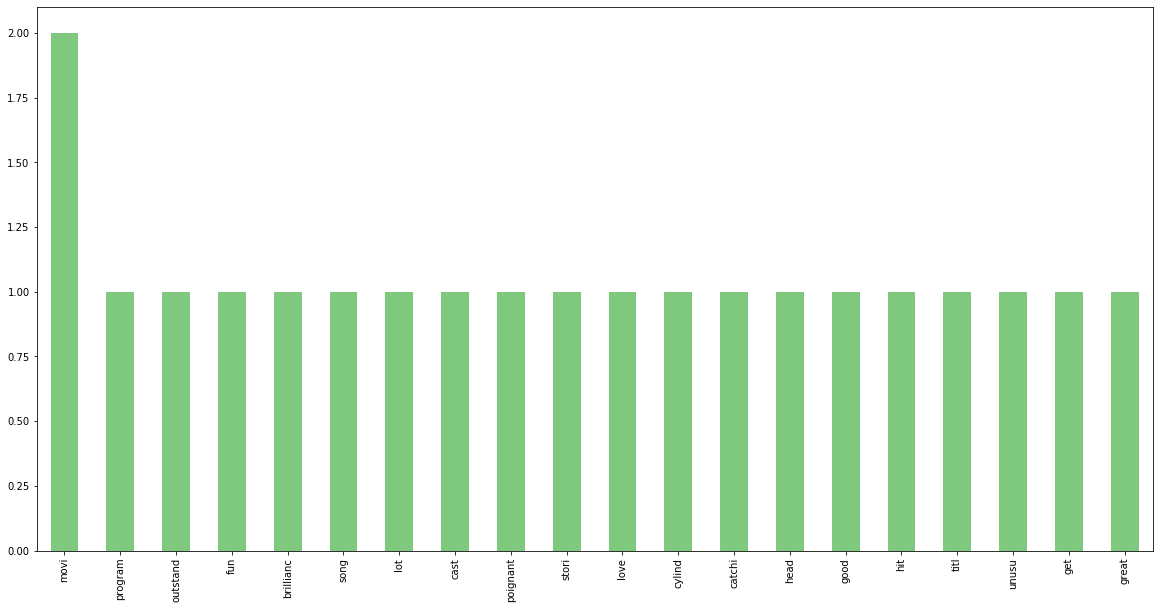

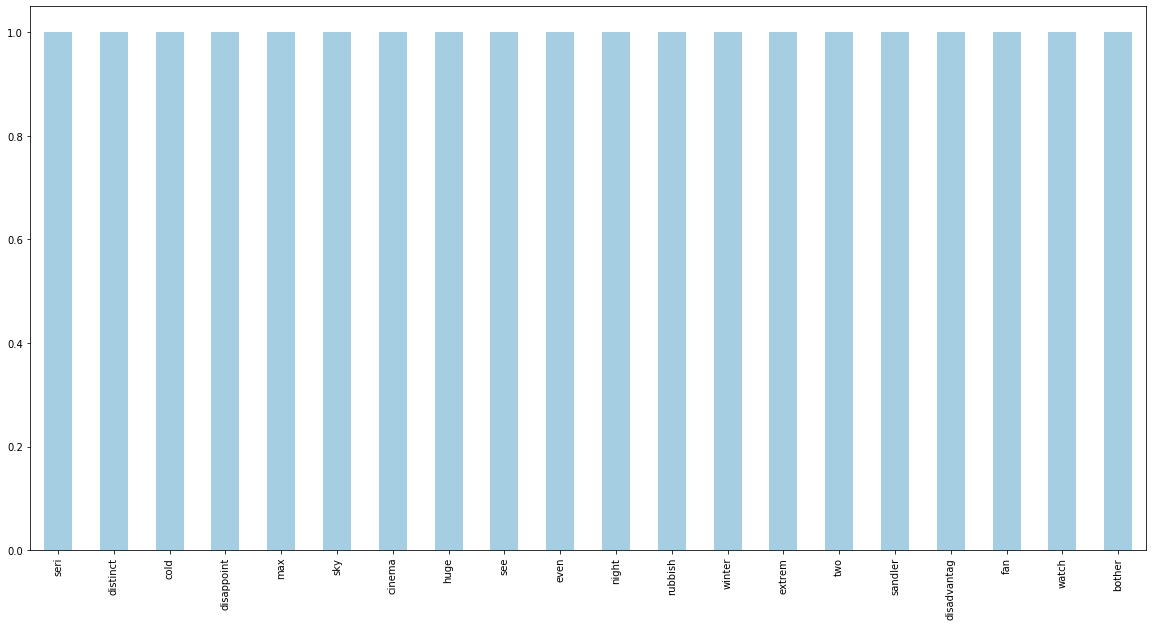

In [15]:
color = ['Accent','Paired']
splitedData = [PositiveReview,NegativeReview]

for item in range(2):
    plt.figure(figsize=(20,10))
    pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(20).plot(kind='bar',colormap=color[item])
    plt.show()

In [16]:
def Movi_Word_Remove(Data):
    return ' '.join([i for i in Data.split() if i !='movi'])

PositiveReview = PositiveReview.apply(Movi_Word_Remove)
NegativeReview = NegativeReview.apply(Movi_Word_Remove)

In [17]:
print(dataset)

                                                Data     Label  \
1  This was a great movie with a good cast, all o...  Positive   
2  Even if you're a huge Sandler fan, please don'...  Negative   
3  A movie of outstanding brilliance and a poigna...  Positive   
4  I had the misfortune to watch this rubbish on ...  Negative   
5  I am at a distinct disadvantage here. I have n...  Negative   
6  This program is a lot of fun and the title son...  Positive   

                                           CleanData  
1                    great movi good cast hit cylind  
2  even huge sandler fan pleas bother extrem disa...  
3  movi outstand brillianc poignant unusu love stori  
4  misfortun watch rubbish sky cinema max cold wi...  
5       distinct disadvantag see first two movi seri  
6          program lot fun titl song catchi get head  


In [18]:
dataset = pd.DataFrame({'data' : [["great", "movi", "good", "cast", "hit", "cylind"],
                                  ["even", "huge", "sandler", "fan", "pleas" ,"bother", "extrem", "disappoint", "comedi"],
                                  ["movi", "outstand", "brillianc", "poignant", "unusu", "love", "stori"],
                                  ["misfortun", "watch", "rubbish", "sky", "cinema", "max", "cold", "winter", "night"],
                                  ["distinct", "disadvantag", "see", "first", "two", "movi", "seri"],
                                  ["program", "lot", "fun", "titl", "song", "catchi", "get", "head"]],
                        'label' : ["Positive",
                                   "Negative",
                                   "Positive",
                                   "Negative",
                                   "Negative",
                                   "Positive"]})

In [19]:
#EMBEDDING
modeldata = Word2Vec(dataset['data'], size=6, window=2, min_count=1)
print(modeldata)

# Dengan Gensim, sangat mudah untuk membuat model Word2Vec.
# Daftar kata dilewatkan ke kelas Word2Vec dari paket gensim.models. 
# Kita perlu menentukan nilai untuk parameter min_count. 
# Nilai 2 untuk min_count menentukan hanya menyertakan kata-kata itu dalam model Word2Vec yang muncul setidaknya dua kali dalam 
# corpus.

Word2Vec(vocab=44, size=6, alpha=0.025)


In [20]:
vocab = modeldata.wv.vocab
print(vocab)

#saat command ini di execute kata" yang keluar lebih dari atau sama dengan 2 kali akan ter-print

{'great': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78A88>, 'movi': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78B48>, 'good': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78B88>, 'cast': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78BC8>, 'hit': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78C48>, 'cylind': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78CC8>, 'even': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78D08>, 'huge': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78D48>, 'sandler': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78C08>, 'fan': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78C88>, 'pleas': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78D88>, 'bother': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78DC8>, 'extrem': <gensim.models.keyedvectors.Vocab object at 0x000001A65DB78E08>, 'disappoint': <gensim.models.keyedvectors

In [21]:
# mengubah hasil dari word embedding menjadi vector
# Dan hanya menggunakan kata-kata yang menurut saya tinggi pengaruhnya
vector = np.array([modeldata.wv['great'], modeldata.wv['good'], modeldata.wv['extrem'], modeldata.wv['disappoint'], modeldata.wv['outstand'], modeldata.wv['brillianc'],
                   modeldata.wv['love'], modeldata.wv['misfortun'], modeldata.wv['rubbish'], modeldata.wv['disadvantag'], modeldata.wv['fun']])
print(vector)

[[ 0.00711249  0.04492803  0.00278219 -0.04993926  0.02499619 -0.04116561]
 [-0.04372824 -0.05793058 -0.08218645 -0.02965533 -0.05217288  0.0385016 ]
 [ 0.02797517 -0.01198457 -0.04218865  0.07982869  0.02121697 -0.01046246]
 [ 0.01430846  0.05175451  0.04094276  0.04918651 -0.07769465 -0.07138854]
 [ 0.08253294 -0.00833459  0.07659475 -0.00583317 -0.01852445 -0.04142046]
 [ 0.0225839   0.04859293 -0.03910868  0.06534865  0.00263967 -0.04844812]
 [-0.02869804 -0.04049836  0.02608403  0.07157283 -0.0800219   0.07397043]
 [ 0.05266644  0.02558435 -0.04961652  0.03142757  0.05095361  0.00124568]
 [ 0.01010454 -0.01858972 -0.04733179 -0.04143386 -0.01613268  0.00097464]
 [-0.07892547  0.01614447  0.06276715  0.0163792   0.06936396 -0.06812721]
 [-0.02732308  0.01667567 -0.05428528 -0.07391896  0.00819962  0.04652911]]


# BPNN TEMPLATE LAB 

# explanation ada di codingan step by step

In [22]:
def load_data():

    features = vector
    
    #target 1,0-> positif 0,1-> negatif
    target = np.array([[1,0], [1,0], [0,1], [0,1], [1,0], [1,0], [1,0], [0,1], [0,1], [0,1], [1,0]])
    
    scaler = MinMaxScaler()
    
    features = scaler.fit_transform(features)

    return features, target


In [23]:
input_dataset, output_dataset = load_data()

In [24]:
layers = {
    "input" : 6,
    "hidden" : 4, #terserah mau kasih brp
    "output" : 2
}

In [25]:
weights = {
    "input_to_hidden" : tf.Variable(tf.random.normal([layers["input"], layers["hidden"]])),
    "hidden_to_output" : tf.Variable(tf.random.normal([layers["hidden"], layers["output"]]))
}

biases = {
    "input_to_hidden" : tf.Variable(tf.random.normal([layers["hidden"]])),
    "hidden_to_output" : tf.Variable(tf.random.normal([layers["output"]]))
}

input_placeholder = tf.placeholder(tf.float32,[None, layers["input"]])
target_placeholder = tf.placeholder(tf.float32,[None, layers["output"]])


In [26]:
#feed foward + mengaktivasi function
def feed_forward(datas) :
    input_to_hidden_bias = tf.matmul(datas, weights["input_to_hidden"]) + biases["input_to_hidden"]
    activated_input_to_hidden = tf.nn.sigmoid(input_to_hidden_bias)

    hidden_to_output_bias = tf.matmul(activated_input_to_hidden, weights["hidden_to_output"]) + biases["hidden_to_output"]
    activated_hidden_to_output = tf.nn.sigmoid(hidden_to_output_bias)

    return activated_hidden_to_output

In [27]:
alpha = 0.2
#epochs 5000 saja biar ga berat 
epochs = 5000

output = feed_forward(input_placeholder)

#calculate error
errors = tf.reduce_mean(0.5 * (target_placeholder - output) ** 2)

#optimize error
optimizer = tf.train.GradientDescentOptimizer(alpha)

train = optimizer.minimize(errors)

#test_size=0.2  0.2 dataset is used for Testing
input_train, input_test, output_train, output_test = train_test_split(input_dataset, output_dataset, test_size = 0.2)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    #train
    for i in range (1, epochs + 1) :
        if i % 200 == 0:
            train_dict = {
                input_placeholder : input_train,
                target_placeholder : output_train
            }

            sess.run(train, feed_dict = train_dict)

            loss = sess.run(errors, feed_dict = train_dict)

            print("Epoch : {}, Loss : {}".format(i, loss))

    # testing
    matches = tf.equal(tf.argmax(target_placeholder, axis = 1), tf.argmax(output, axis = 1))

    accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))

    test_dict = {
        input_placeholder : input_test,
        target_placeholder : output_test
    }

    print("Accuracy : {}%".format(sess.run(accuracy, feed_dict=test_dict) * 100))


Epoch : 200, Loss : 0.135300412774086
Epoch : 400, Loss : 0.1351548135280609
Epoch : 600, Loss : 0.13500964641571045
Epoch : 800, Loss : 0.13486497104167938
Epoch : 1000, Loss : 0.13472077250480652
Epoch : 1200, Loss : 0.13457700610160828
Epoch : 1400, Loss : 0.134433776140213
Epoch : 1600, Loss : 0.13429096341133118
Epoch : 1800, Loss : 0.13414865732192993
Epoch : 2000, Loss : 0.1340068280696869
Epoch : 2200, Loss : 0.13386549055576324
Epoch : 2400, Loss : 0.133724644780159
Epoch : 2600, Loss : 0.13358429074287415
Epoch : 2800, Loss : 0.1334444284439087
Epoch : 3000, Loss : 0.13330507278442383
Epoch : 3200, Loss : 0.13316620886325836
Epoch : 3400, Loss : 0.1330278515815735
Epoch : 3600, Loss : 0.1328900307416916
Epoch : 3800, Loss : 0.1327527016401291
Epoch : 4000, Loss : 0.13261592388153076
Epoch : 4200, Loss : 0.13247963786125183
Epoch : 4400, Loss : 0.13234388828277588
Epoch : 4600, Loss : 0.1322086751461029
Epoch : 4800, Loss : 0.1320739984512329
Epoch : 5000, Loss : 0.13193988800

# Explanation Number 4

Model yang saya gunakan mendapatkan accuracy 33% sebagian besarnya dikarenakan data yang digunakan sangat sedikit jadi tidak banyak yang dapat dipelajari oleh model tersebut

model yang saya lakukan dapat 33% karena model tersebut hanya bisa belajar sedikit sehingga saat model tersebut belajar berulang-ulang menggunakan kata yang sama jadi tidak effective sama begitu juga dengan test data

not good enough

# Refrensi

https://medium.com/analytics-vidhya/text-preprocessing-for-nlp-natural-language-processing-beginners-to-master-fd82dfecf95
ini codingan pre processing


https://chatbotsmagazine.com/contextual-chat-bots-with-tensorflow-4391749d0077



https://stackabuse.com/implementing-word2vec-with-gensim-library-in-python/
ini codingan word embedding word2vec

BPNN ambil dari template lab saat quiz